In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
import warnings
warnings.filterwarnings('ignore')
data = pd.read_csv('https://raw.githubusercontent.com/wri/global-power-plant-database/master/source_databases_csv/database_IND.csv')

data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [3]:
data.tail()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
903,IND,India,YERMARUS TPP,IND0000513,1600.0,16.2949,77.3568,Coal,Oil,NaN,...,WRI,NaN,2018.0,NaN,NaN,0.994875,233.59665,865.4,Central Electricity Authority,NaN
904,IND,India,Yelesandra Solar Power Plant,WRI1026222,3.0,12.8932,78.1654,Solar,NaN,NaN,...,Industry About,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
905,IND,India,Yelisirur wind power project,WRI1026776,25.5,15.2758,75.5811,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
906,IND,India,ZAWAR MINES,WRI1019901,80.0,24.3500,73.7477,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
907,IND,India,iEnergy Theni Wind Farm,WRI1026761,16.5,9.9344,77.4768,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.shape

(908, 25)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   country                   908 non-null    object 
 1   country_long              908 non-null    object 
 2   name                      908 non-null    object 
 3   gppd_idnr                 908 non-null    object 
 4   capacity_mw               908 non-null    float64
 5   latitude                  862 non-null    float64
 6   longitude                 862 non-null    float64
 7   primary_fuel              908 non-null    object 
 8   other_fuel1               199 non-null    object 
 9   other_fuel2               1 non-null      object 
 10  other_fuel3               0 non-null      float64
 11  commissioning_year        528 non-null    float64
 12  owner                     342 non-null    object 
 13  source                    908 non-null    object 
 14  url       

In [6]:
data.describe()

,capacity_mw,latitude,longitude,other_fuel3,commissioning_year,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,estimated_generation_gwh
count,908.000000,862.000000,862.000000,0.0,528.000000,0.0,520.0,384.000000,401.000000,425.000000,437.000000,443.000000,0.0
mean,321.046378,21.196189,77.447848,NaN,1996.876894,NaN,2018.0,2304.059202,2420.393316,2414.072373,2453.936292,2531.754458,NaN
std,580.221767,6.248627,4.907260,NaN,17.047817,NaN,0.0,3794.767492,4013.558173,4183.203199,4152.038216,4187.236364,NaN
min,0.000000,8.168900,68.644700,NaN,1927.000000,NaN,2018.0,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,16.837500,16.771575,74.258975,NaN,1988.000000,NaN,2018.0,244.458088,223.650436,174.174750,187.193669,177.643170,NaN
50%,60.000000,21.778300,76.719250,NaN,2000.000000,NaN,2018.0,797.063475,805.760000,701.027250,716.728350,807.601700,NaN
75%,388.125000,25.516375,79.441475,NaN,2011.250000,NaN,2018.0,2795.021500,3034.575000,3080.000000,3263.483000,3258.785000,NaN
max,4760.000000,34.649000,95.408000,NaN,2018.000000,NaN,2018.0,27586.200000,28127.000000,30539.000000,30015.000000,35116.000000,NaN


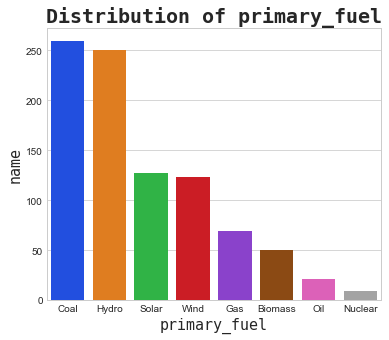

In [7]:
# Creating a barplot for 'country'
income = data['primary_fuel'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of primary_fuel', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('primary_fuel', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('name', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

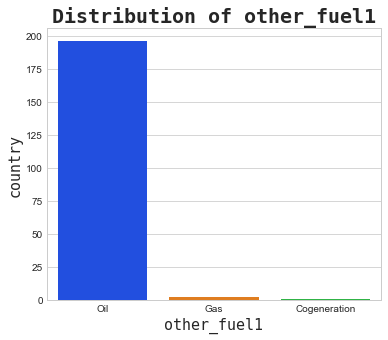

In [8]:
# Creating a barplot for 'country'
income = data['other_fuel1'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of other_fuel1', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('other_fuel1', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('country', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()


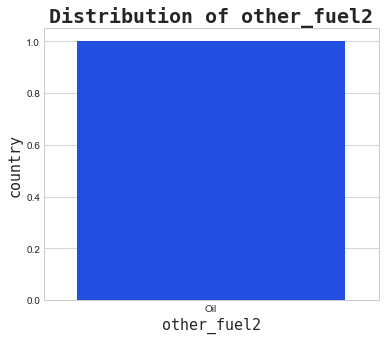

In [9]:
# Creating a barplot for 'country'
income = data['other_fuel2'].value_counts()

plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of other_fuel2', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('other_fuel2', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('country', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()


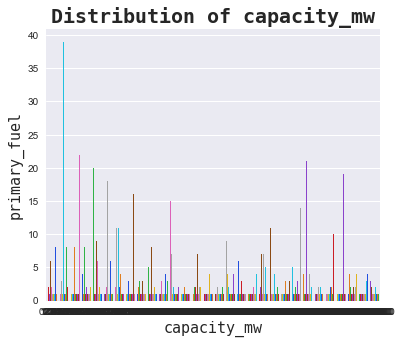

In [10]:
# Creating a barplot for 'country'
income = data['capacity_mw'].value_counts()

plt.style.use('seaborn')
plt.figure(figsize=(6, 5))
sns.barplot(income.index, income.values, palette='bright')
plt.title('Distribution of capacity_mw', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('capacity_mw', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('primary_fuel', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=10)
plt.show()

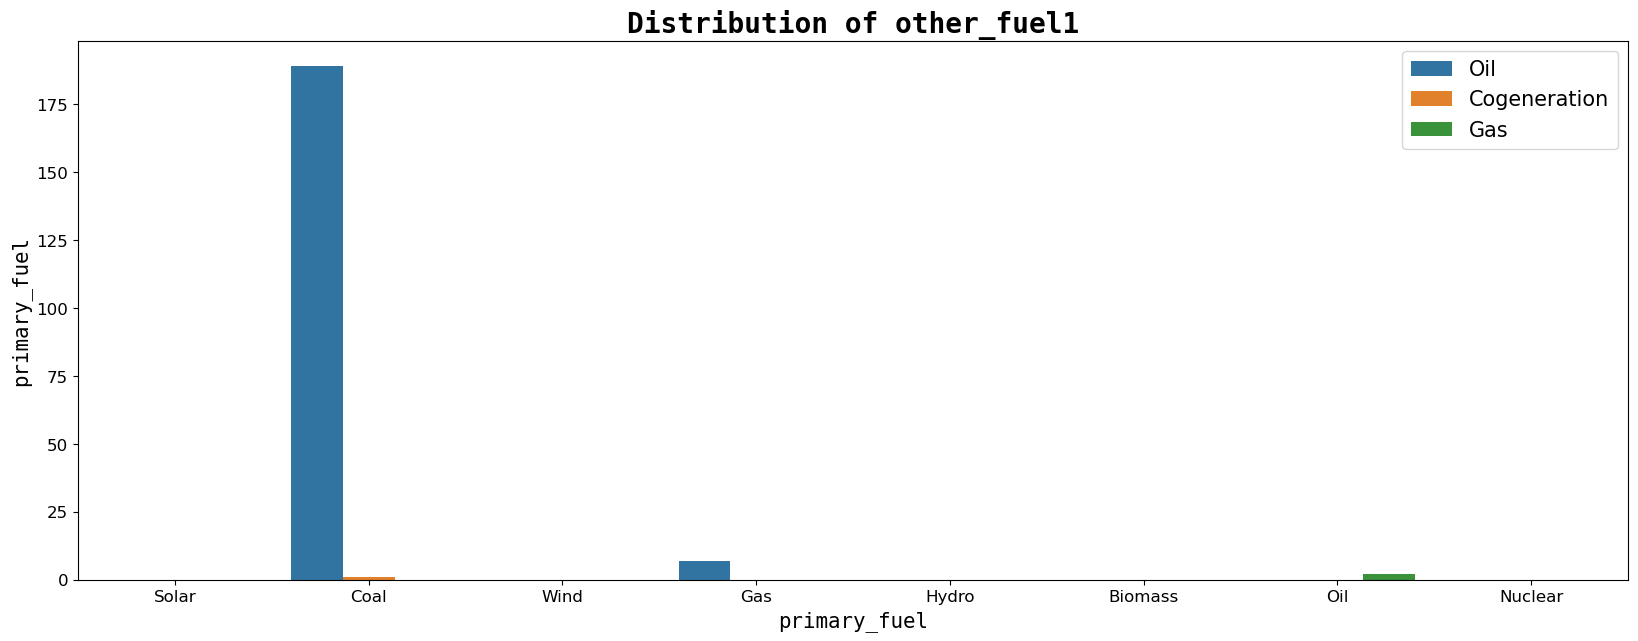

In [11]:
# Creating a countplot of primary fuel across other fuel
plt.style.use('default')
plt.figure(figsize=(20, 7))
sns.countplot(data['primary_fuel'], hue=data['other_fuel1'])
plt.title('Distribution of other_fuel1', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('primary_fuel', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('primary_fuel', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


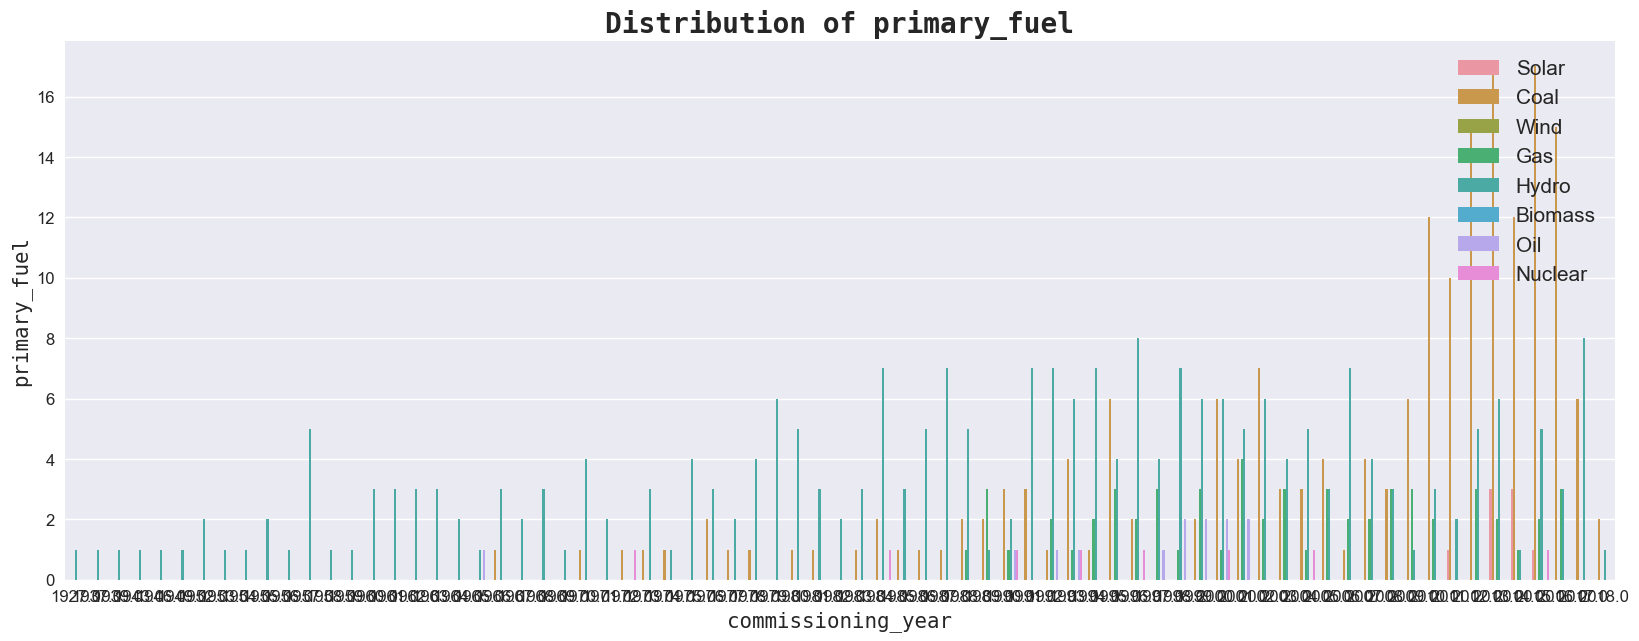

In [12]:
# Creating a countplot of income across age
plt.style.use('seaborn')
plt.figure(figsize=(20, 7))
sns.countplot(data['commissioning_year'], hue=data['primary_fuel'])
plt.title('Distribution of primary_fuel', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('commissioning_year', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('primary_fuel', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()


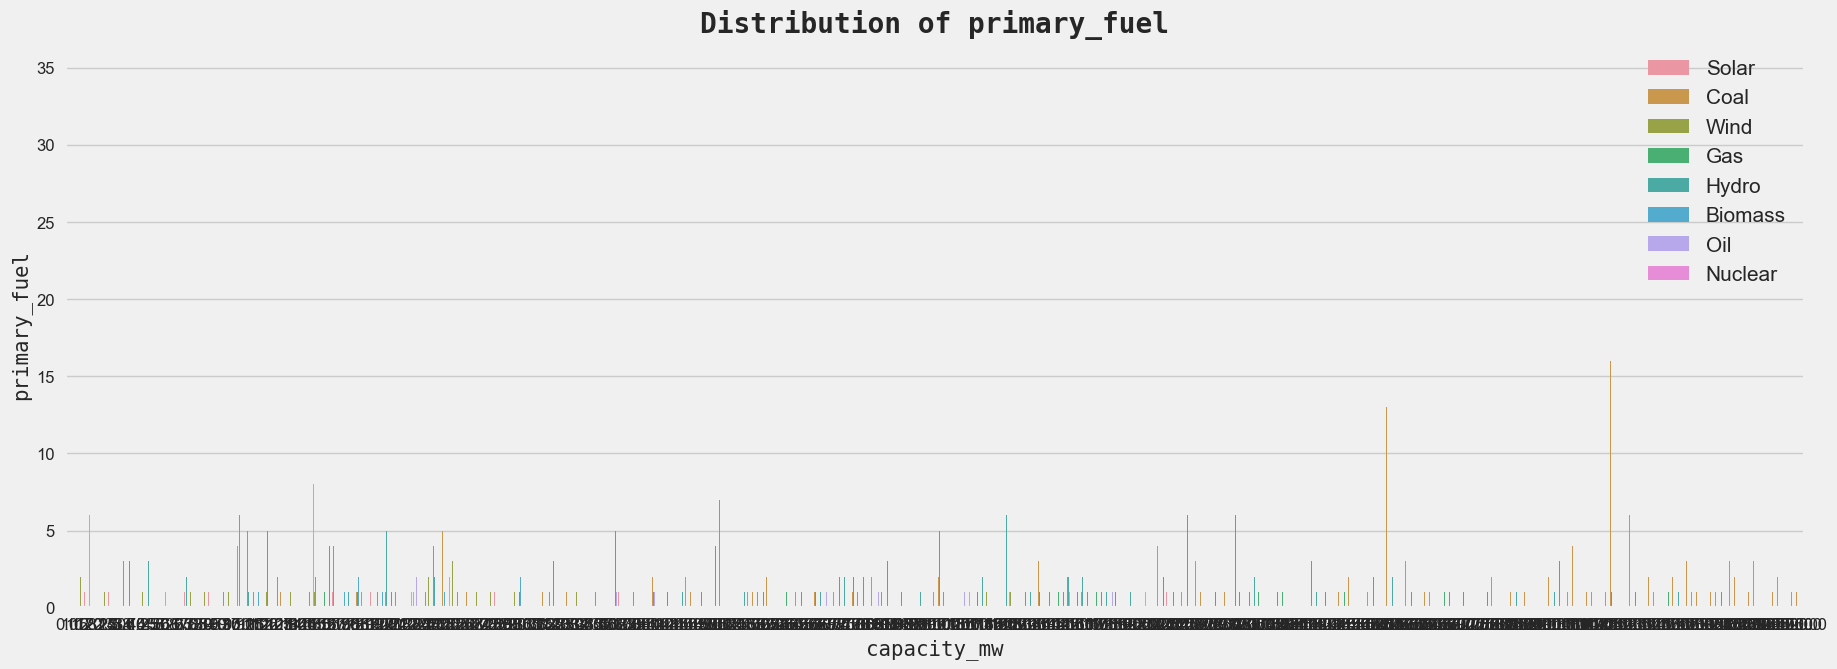

In [13]:
# Creating a countplot of income across age
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20, 7))
sns.countplot(data['capacity_mw'], hue=data['primary_fuel'])
plt.title('Distribution of primary_fuel', fontdict={
          'fontname': 'Monospace', 'fontsize': 20, 'fontweight': 'bold'})
plt.xlabel('capacity_mw', fontdict={'fontname': 'Monospace', 'fontsize': 15})
plt.ylabel('primary_fuel', fontdict={
           'fontname': 'Monospace', 'fontsize': 15})
plt.tick_params(labelsize=12)
plt.legend(loc=1, prop={'size': 15})
plt.show()

In [14]:
data.columns

Index(['country', 'country_long', 'name', 'gppd_idnr', 'capacity_mw',
       'latitude', 'longitude', 'primary_fuel', 'other_fuel1', 'other_fuel2',
       'other_fuel3', 'commissioning_year', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'year_of_capacity_data',
       'generation_gwh_2013', 'generation_gwh_2014', 'generation_gwh_2015',
       'generation_gwh_2016', 'generation_gwh_2017', 'generation_data_source',
       'estimated_generation_gwh'],
      dtype='object')

In [15]:
# analyzing the different values present in the dependent variable(primary column)
data['primary_fuel'].value_counts()

Coal       259
Hydro      250
Solar      127
Wind       123
Gas         69
Biomass     50
Oil         21
Nuclear      9
Name: primary_fuel, dtype: int64

In [16]:
# analyzing the different values present in the dependent variable(capacity column)
data['capacity_mw'].value_counts()

5.0       39
10.0      22
600.0     21
15.0      20
1200.0    19
          ..
26.4       1
68.8       1
91.8       1
1.8        1
816.4      1
Name: capacity_mw, Length: 365, dtype: int64

<AxesSubplot:xlabel='primary_fuel', ylabel='count'>

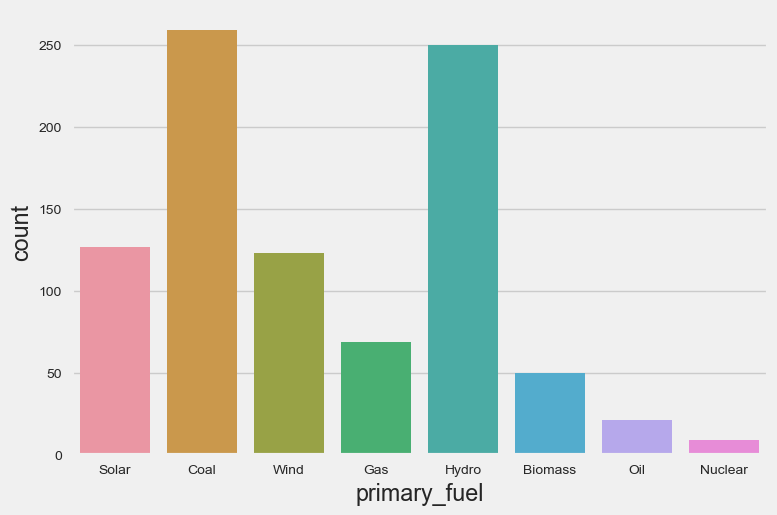

In [17]:
sns.countplot(data['primary_fuel'])

In [18]:
# dividing the dataset into dependent and independent variables

x = data.iloc[:,:11]
y = data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(908, 11)
(908,)


In [19]:
# dividing the dataset in training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(681, 11)
(681,)
(227, 11)
(227,)


<AxesSubplot:xlabel='capacity_mw', ylabel='count'>

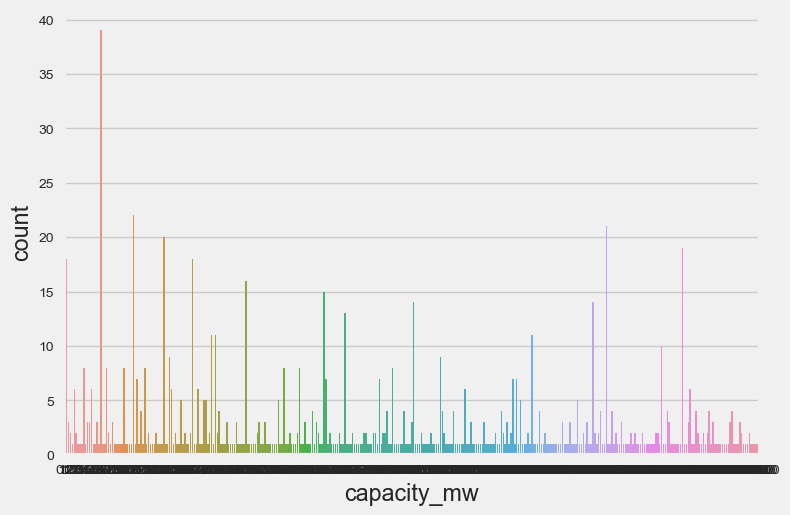

In [20]:
sns.countplot(data['capacity_mw'])

In [21]:
# dividing the dataset into dependent and independent variables

x = data.iloc[:,:11]
y = data.iloc[:,11]

# determining the shape of x and y.
print(x.shape)
print(y.shape)

(908, 11)
(908,)


In [22]:
# dividing the dataset in training and testing set

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 44)

# determining the shapes of training and testing sets
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(681, 11)
(681,)
(227, 11)
(227,)


In [23]:
import matplotlib.pyplot as plt

In [25]:
data.head()

,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,geolocation_source,wepp_id,year_of_capacity_data,generation_gwh_2013,generation_gwh_2014,generation_gwh_2015,generation_gwh_2016,generation_gwh_2017,generation_data_source,estimated_generation_gwh
0,IND,India,ACME Solar Tower,WRI1020239,2.5,28.1839,73.2407,Solar,NaN,NaN,...,National Renewable Energy Laboratory,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IND,India,ADITYA CEMENT WORKS,WRI1019881,98.0,24.7663,74.6090,Coal,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IND,India,AES Saurashtra Windfarms,WRI1026669,39.2,21.9038,69.3732,Wind,NaN,NaN,...,WRI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IND,India,AGARTALA GT,IND0000001,135.0,23.8712,91.3602,Gas,NaN,NaN,...,WRI,NaN,2018.0,631.777928,617.789264,843.747,886.004428,663.774500,Central Electricity Authority,NaN
4,IND,India,AKALTARA TPP,IND0000002,1800.0,21.9603,82.4091,Coal,Oil,NaN,...,WRI,NaN,2018.0,1668.290000,3035.550000,5916.370,6243.000000,5385.579736,Central Electricity Authority,NaN


In [29]:
datacorr=data.corr()

<AxesSubplot:>

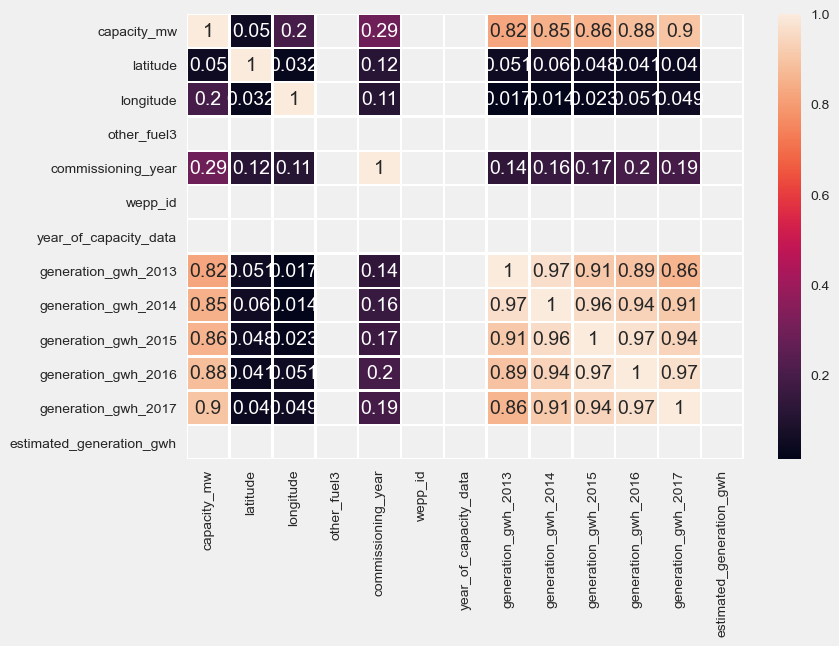

In [30]:
sns.heatmap(datacorr,annot=True, linewidth=1)

<AxesSubplot:xlabel='capacity_mw', ylabel='generation_gwh_2013'>

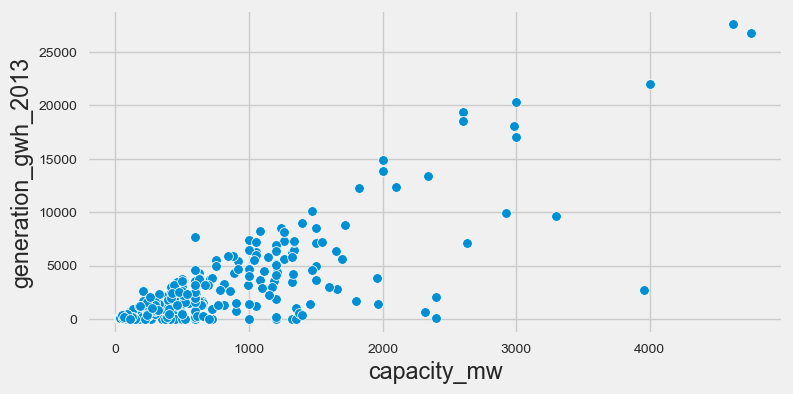

In [32]:
plt.figure(figsize=(8,4))
sns.scatterplot(x='capacity_mw',y='generation_gwh_2013',data=data)